## Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and it can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(data.head())
print(data.tail())
print(data.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

Looks like the data contains 48204 rows and no null values. Each row describes the traffic for a 1 hr period starting 9 am on 10/02/2012 and ending 11 pm on 09/30/2018 (a six year period). 

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

Let's plot a histogram to visualize the distribution of the traffic_volume column.

We will also use the `Series.describe()` method to get some basic statistics on the `traffic_volume` column.

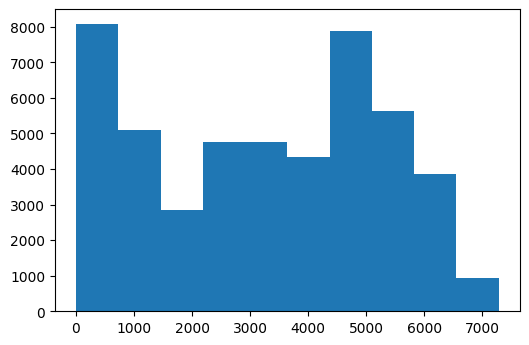

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [3]:
plt.hist(data['traffic_volume'])
plt.show()

print(data['traffic_volume'].describe())

The minimum traffic is 0 and the maximum is 7280 vehicles per hour. The median value is 3380 vehicles per hour. The histogram shows two peaks in the range 0-500 and 4500-5000 vehicles per hour. 

While we have time information, this histogram does not separate the data by time yet. However, we could use the included information to figure out whether more traffic is seen during the day or night. 

We can start by arbitrarily dividing the data into two parts:
* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

First we will transform the `date_time` column to a `datetime` series (using `pd.to_datetime()` object and extract the hour for every instance, which we can then use to isolate the daytime and nighttime data. We can then compare the two data subsets.

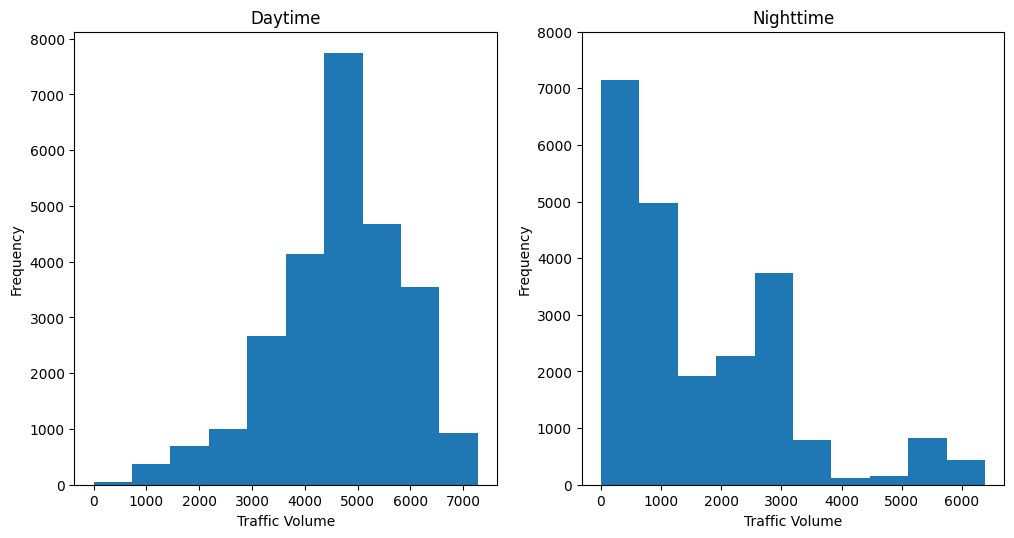

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64


In [4]:
import datetime as dt
times = pd.to_datetime(data['date_time']).dt.hour
daydata = data[(times>=7) & (times<=19)]
nightdata = data[(times<7) | (times>19)]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(daydata['traffic_volume'])
plt.title('Daytime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(nightdata['traffic_volume'])
plt.title('Nighttime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])
plt.show()
print(daydata['traffic_volume'].describe())
print(nightdata['traffic_volume'].describe())

While the minumum is zero for both datasets, the average of 4650 vehicles/hr for daytime traffic compared to 1655 vehicles/hr for night traffic shows that there is definitely lighter traffic at night. This is confirmed by the left skew of the daytime traffic distribution compared to the right skew for nighttime data.

With our goal of finding indicators for heavy traffic, we can now focus on the daytime data.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

The fastest way to get the average traffic volume for each month is by using the `DataFrame.groupby()` method.

Let's start with generating the plot for the first time unit mentioned above — the month.

In the code below, we'll do the following:

* Use `daydata['date_time'].dt.month` to create a new column where each value describes the month when the traffic volume measurement was taken.
* Use `daydata.groupby('month').mean()` to group the dataset by the month column with the mean as an aggregate function.


<ipython-input-8-27db17ce832b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



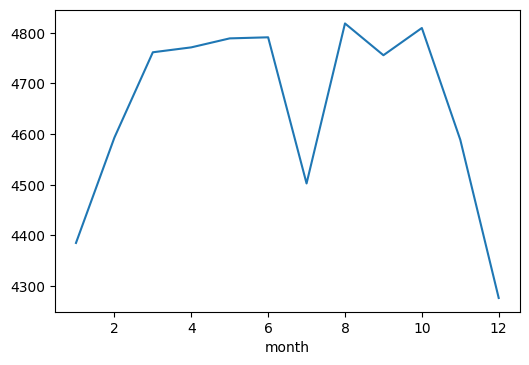

In [8]:
daydata['month'] = pd.to_datetime(daydata['date_time']).dt.month
by_month = daydata.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

The traffic volume looks like it is much higher for summer months and lower for winter months. However, there seems to be a large discrepancy in July. It is worth a little more exploration.

Let's specifically look at the traffic in July but see how things changed over the years. 

<ipython-input-16-55910fed6b6d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



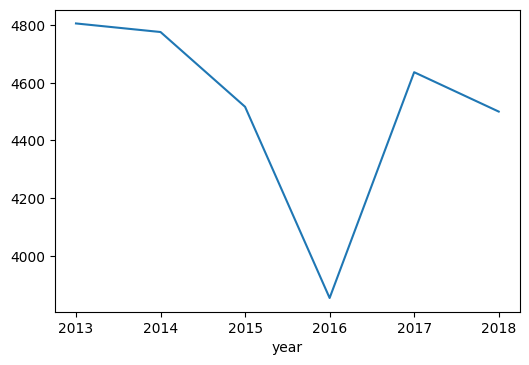

In [16]:
daydata['year'] = pd.to_datetime(daydata['date_time']).dt.year
July_Data = daydata[daydata['month']==7]
July_Data = July_Data.groupby('year').mean()['traffic_volume']
July_Data.plot.line()
plt.show()

Looks like the data is skewed for one particular year - 2016. The traffic was much lower that year and the mean got skewed by this. There must have been something significant that happened that year.

We'll now continue with building line plots for another time unit: day of the week.

To get the traffic volume averages for each day of the week, we'll need to use the following code and generating a plot for day of the week (0 is Monday, 6 is Sunday). 

<ipython-input-18-63613c858589>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



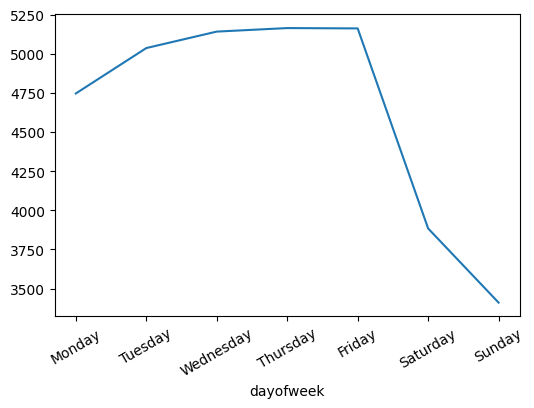

In [18]:
daydata['dayofweek'] = pd.to_datetime(daydata['date_time']).dt.dayofweek
by_dayofweek = daydata.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.xticks([0,1,2,3,4,5,6],labels = ['Monday','Tuesday','Wednesday',
                                    'Thursday', 'Friday', 'Saturday',
                                    'Sunday'], rotation = 30)
plt.show()

Looks like there is a lot more traffic during the week than during the weekend, although the traffic volume is still a little lower on Mondays. 

Let's extend this analysis by looking at the values for the hourly traffic. Since we already know the values change significantly over the weekend, we should do the analysis of the weekdays and weekend separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

<ipython-input-24-85f42be094ba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



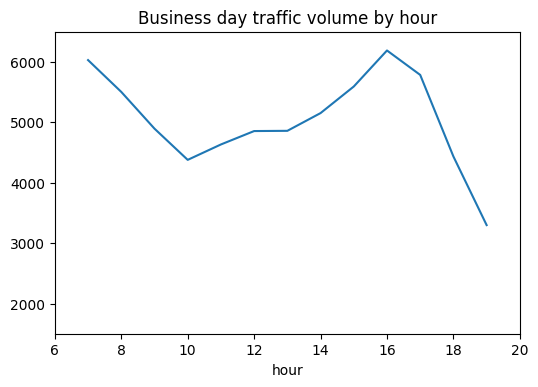

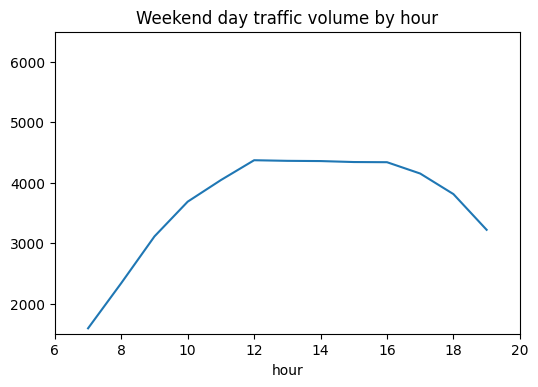

In [24]:
daydata['hour'] = pd.to_datetime(daydata['date_time']).dt.hour
bussiness_days = daydata.copy()[daydata['dayofweek'] <= 4] # 4 == Friday
weekend = daydata.copy()[daydata['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()['traffic_volume']
by_hour_business.plot.line()
plt.title('Business day traffic volume by hour')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.show()
by_hour_weekend = weekend.groupby('hour').mean()['traffic_volume']
by_hour_weekend.plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Weekend day traffic volume by hour')
plt.show()

Interestingly, looks like traffic peaks at 7 am and 4 pm on business days, corresponding to people going to work and back home. During weekends, there is very little traffic early on as people likely sleep in and the peak is between 11 am and 4 pm as people drive to various activities. 

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [25]:
daydata.corr()['traffic_volume']

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
month            -0.017397
year             -0.000458
dayofweek        -0.371023
hour             -0.007369
Name: traffic_volume, dtype: float64

The strongest correlation that we have not looked at yet seems to be with `temp` but it is still relatively weak at only 0.12. We can confirm this by looking at a scatter plot of `traffic_volume` with `temp`.

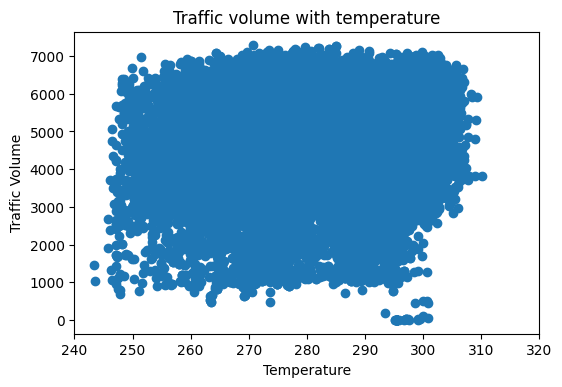

In [29]:
plt.scatter(daydata['temp'], daydata['traffic_volume'])
plt.title('Traffic volume with temperature')
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.xlim([240,320])
plt.show()

Definitely looks like there is not a whole lot of correlation here. 

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

We're going to calculate the average traffic volume associated with each unique value in these two columns. 

We group the data by `weather_main` and `weather_description` while using the mean as an aggregate function.

We then create bar plots for the `traffic_volume` column of `by_weather_main` and `by_weather_description`.

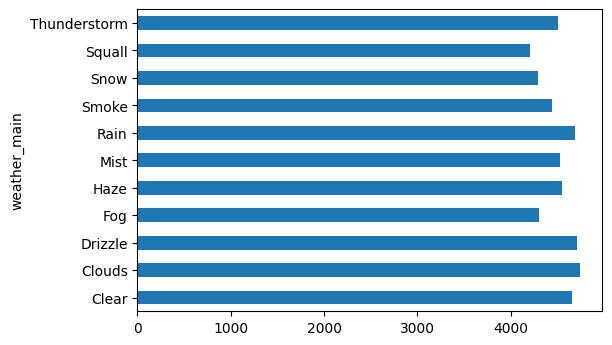

In [35]:
by_weather_main = daydata.groupby('weather_main').mean()['traffic_volume']
by_weather_main.plot.barh()
plt.show()

Most of the bars are of the same length and none of them exceed 5000 vehicles. It does not look like any of the labels in the `weather_main` column would give a good indication of heavy traffic conditions. How about looking at the `weather_description` column which is more granular? 

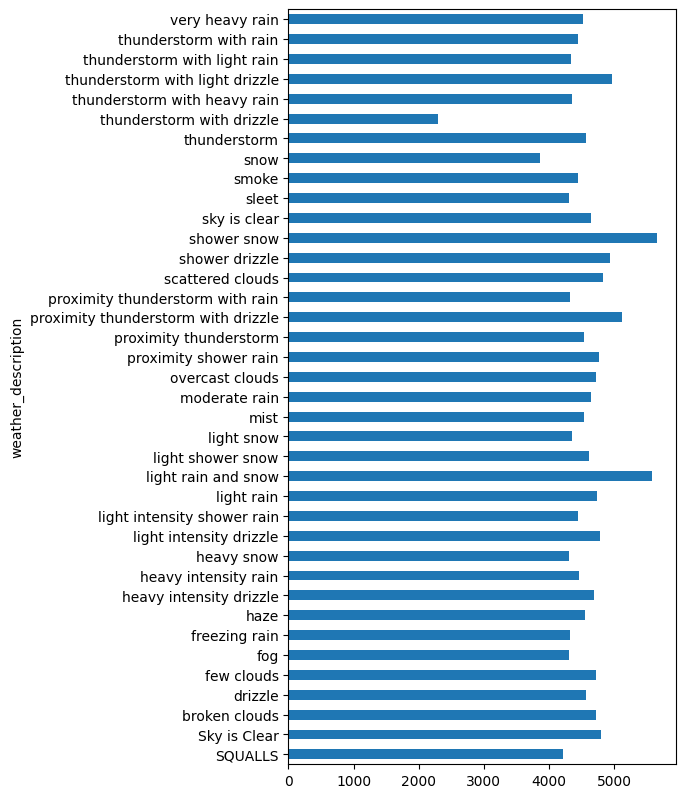

In [36]:
by_weather_description = daydata.groupby('weather_description').mean()['traffic_volume']
by_weather_description.plot.barh(figsize=(5,10))
plt.show()

This effort paid off. Looks like there is a lot more cars when there is a `snow shower` or `light rain and snow` or `proximity thunderstorm with drizzle`. Those are definite predictors for heavy traffic (defined as >5000 vehicles).

While lower volumes makes sense for bad weather (who wants to drive in a bad snow storm after all?), this increase in traffic volume for moderate conditions is a little surprising. Maybe people are just not walking/running or using their bikes as much when those conditions exist, instead electing to use their more protected vehicles. 

## Main Conclusions

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to the weekends.
* On business days, the rush hours are around 7 and 16.
    
Weather indicators
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

Next steps include the following:

* Use the nighttime data to look for heavy traffic indicators.
* Find more time and weather indicators.
* Make your project portfolio-ready by following this style guide.